In [1]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout,Input,Flatten,Dense,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Data Augumentation

In [2]:
tf.test.is_gpu_available()

True

In [3]:
batchsize = 16

In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255, rotation_range = 0.2, shear_range = 0.2, zoom_range = 0.2, width_shift_range =0.2, height_shift_range = 0.2, validation_split = 0.2)

In [5]:
train_data = train_datagen.flow_from_directory(r'D:\python\projects\internship\CV_Driver_Drowsiness_Detection\MRL Eye Data\Prepeared Data\train',
                                              target_size = (80,80), batch_size = batchsize, class_mode = 'categorical', subset = 'training')

validation_data = train_datagen.flow_from_directory(r'D:\python\projects\internship\CV_Driver_Drowsiness_Detection\MRL Eye Data\Prepeared Data\train',
                                              target_size = (80,80), batch_size = batchsize, class_mode = 'categorical', subset = 'validation')

Found 61497 images belonging to 2 classes.
Found 15373 images belonging to 2 classes.


In [6]:
test_datagen = ImageDataGenerator(rescale = 1./255)

test_data = test_datagen.flow_from_directory(r'D:\python\projects\internship\CV_Driver_Drowsiness_Detection\MRL Eye Data\Prepeared Data\test',
                                              target_size = (80,80), batch_size = batchsize, class_mode = 'categorical')

Found 8028 images belonging to 2 classes.


In [7]:
bmodel = MobileNetV2(include_top = False, weights = 'imagenet', input_tensor = Input(shape = (80,80,3), batch_size = batchsize))
hmodel = bmodel.output
hmodel = Flatten()(hmodel)
hmodel = Dense(64, activation='relu')(hmodel)
hmodel = Dropout(0.5)(hmodel)
hmodel = Dense(2,activation= 'softmax')(hmodel)

model = Model(inputs=bmodel.input, outputs= hmodel)
for layer in bmodel.layers:
    layer.trainable = False

C:\Users\sandi\anaconda3\envs\myenv\lib\site-packages\keras_applications\mobilenet_v2.py:294: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


9412608/9406464 [==============================] - 3s 0us/step


In [8]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(16, 80, 80, 3)]    0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (16, 81, 81, 3)      0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (16, 40, 40, 32)     864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (16, 40, 40, 32)     128         Conv1[0][0]                      
______________________________________________________________________________________________

In [9]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau

In [10]:
checkpoint = ModelCheckpoint(r'D:\python\projects\internship\CV_Driver_Drowsiness_Detection\models\model.h5',
                            monitor = 'val_loss',save_best_only=True,verbose=3)

earlystop = EarlyStopping(monitor = 'val_loss', patience = 5, verbose = 3, restore_best_weights=True)

learning_rate = ReduceLROnPlateau(monitor = 'val_loss', patience = 3, verbose = 3)

callbacks = [checkpoint,earlystop,learning_rate]

In [11]:
from PIL.Image import core as _imaging

In [12]:
model.compile(optimizer='Adam', loss='categorical_crossentropy',metrics=['accuracy'])

history = model.fit_generator(train_data,steps_per_epoch=train_data.samples//batchsize,
                   validation_data=validation_data,
                   validation_steps=validation_data.samples//batchsize,
                   callbacks=callbacks,epochs=10)

Epoch 1/10
3842/3843 [============================>.] - ETA: 0s - loss: 0.3300 - accuracy: 0.8678
Epoch 00001: val_loss improved from inf to 1.01883, saving model to D:\python\projects\internship\CV_Driver_Drowsiness_Detection\models\model.h5
3843/3843 [==============================] - 1290s 336ms/step - loss: 0.3300 - accuracy: 0.8678 - val_loss: 1.0188 - val_accuracy: 0.5646
Epoch 2/10
3842/3843 [============================>.] - ETA: 0s - loss: 0.2773 - accuracy: 0.8872
Epoch 00002: val_loss improved from 1.01883 to 0.60619, saving model to D:\python\projects\internship\CV_Driver_Drowsiness_Detection\models\model.h5
3843/3843 [==============================] - 1769s 460ms/step - loss: 0.2773 - accuracy: 0.8872 - val_loss: 0.6062 - val_accuracy: 0.6512
Epoch 3/10
3842/3843 [============================>.] - ETA: 0s - loss: 0.2688 - accuracy: 0.8912
Epoch 00003: val_loss did not improve from 0.60619
3843/3843 [==============================] - 1888s 491ms/step - loss: 0.2688 - accura

In [13]:
import matplotlib.pyplot as plt

In [14]:
acc_tr, loss_tr = model.evaluate_generator(train_data)
print(acc_tr)
print(loss_tr)

0.6757668747676151
0.6319007


In [15]:
acc_vr, loss_vr = model.evaluate_generator(validation_data)
print(acc_vr)
print(loss_vr)

0.6030734057046868
0.65016586


In [16]:
acc_test, loss_test = model.evaluate_generator(test_data)
print(acc_test)
print(loss_test)

0.6457553589011569
0.6017688


In [17]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


In [18]:
history.history

{'loss': [0.3299764333988232,
  0.27732974919749925,
  0.26878557148391047,
  0.2638610002413324,
  0.25831785081432657,
  0.2357026367152715,
  0.2284610000755448],
 'accuracy': [0.8678291,
  0.8871847,
  0.8912184,
  0.8934305,
  0.89561003,
  0.90470225,
  0.9081505],
 'val_loss': [1.0188344460912049,
  0.6061926662301024,
  0.7838481350646664,
  1.2527569571820398,
  1.1469676905932527,
  1.0053736029503246,
  1.0861091267938414],
 'val_accuracy': [0.56464845,
  0.65117186,
  0.57532555,
  0.5705078,
  0.53190106,
  0.5372396,
  0.53802085],
 'lr': [0.001, 0.001, 0.001, 0.001, 0.001, 0.000100000005, 0.000100000005]}

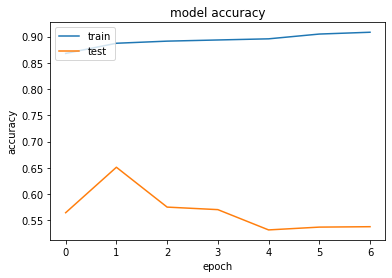

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

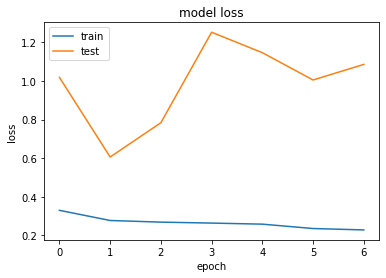

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

In [21]:
import pandas as pd

<AxesSubplot:>

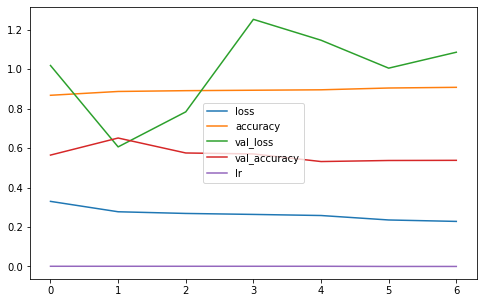

In [22]:
pd.DataFrame(history.history).plot(figsize=(8,5))